In [1]:
import cv2
import numpy as np

In [2]:
# Load an image
image = cv2.imread('data/ana.png')

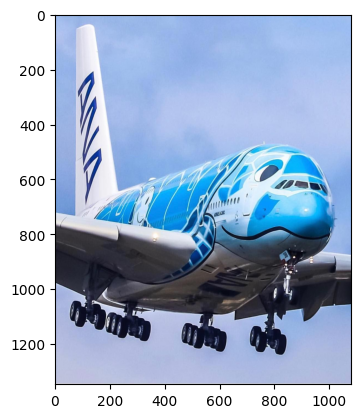

In [3]:
# Plot the image
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))


In [4]:
image

array([[[235, 188, 160],
        [235, 188, 160],
        [235, 188, 160],
        ...,
        [241, 194, 163],
        [242, 195, 164],
        [242, 195, 164]],

       [[235, 188, 160],
        [235, 188, 160],
        [235, 188, 160],
        ...,
        [241, 194, 163],
        [242, 195, 164],
        [242, 195, 164]],

       [[236, 189, 161],
        [236, 189, 161],
        [236, 189, 161],
        ...,
        [241, 194, 163],
        [242, 195, 164],
        [242, 195, 164]],

       ...,

       [[210, 196, 198],
        [210, 196, 198],
        [210, 196, 198],
        ...,
        [207, 185, 180],
        [209, 184, 180],
        [207, 185, 180]],

       [[197, 186, 189],
        [195, 186, 189],
        [197, 186, 189],
        ...,
        [196, 179, 176],
        [196, 179, 176],
        [196, 179, 176]],

       [[255, 252, 255],
        [255, 252, 255],
        [255, 252, 255],
        ...,
        [255, 251, 247],
        [255, 251, 247],
        [255, 251, 247]]

In [5]:
image[:, :, 1]

array([[188, 188, 188, ..., 194, 195, 195],
       [188, 188, 188, ..., 194, 195, 195],
       [189, 189, 189, ..., 194, 195, 195],
       ...,
       [196, 196, 196, ..., 185, 184, 185],
       [186, 186, 186, ..., 179, 179, 179],
       [252, 252, 252, ..., 251, 251, 251]], dtype=uint8)

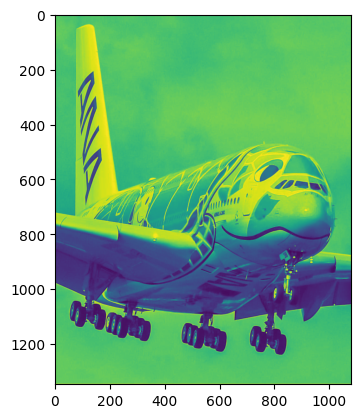

In [6]:
plt.imshow(image[:, :, 1])

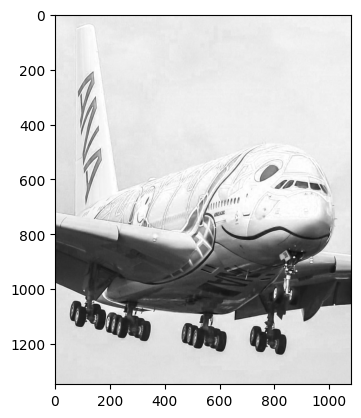

In [7]:
plt.imshow(image[:, :, 0], cmap='gray')

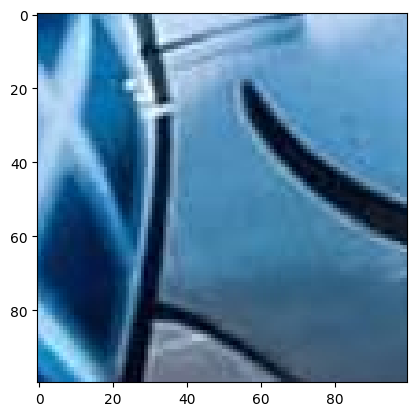

In [8]:
# Plot a zoomed part of the image
plt.imshow(cv2.cvtColor(image[750:850, 550:650], cv2.COLOR_BGR2RGB))

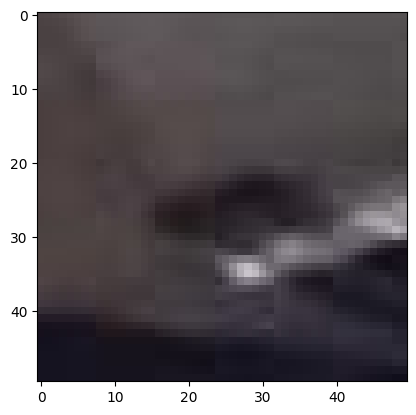

In [9]:
# Plot a zoomed part of the image
plt.imshow(cv2.cvtColor(image[900:950, 600:650], cv2.COLOR_BGR2RGB))

In [10]:
# Grayscale the image
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


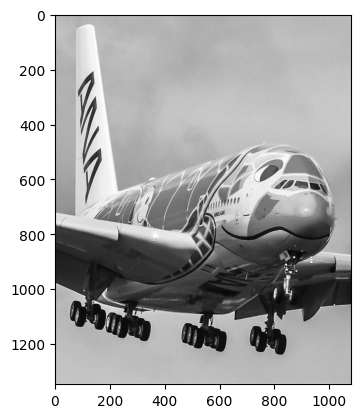

In [12]:
# Plot the grayscale image
plt.imshow(gray_image, cmap='gray')

# Convolution operation
Demonstration of the convolution operation using a kernel

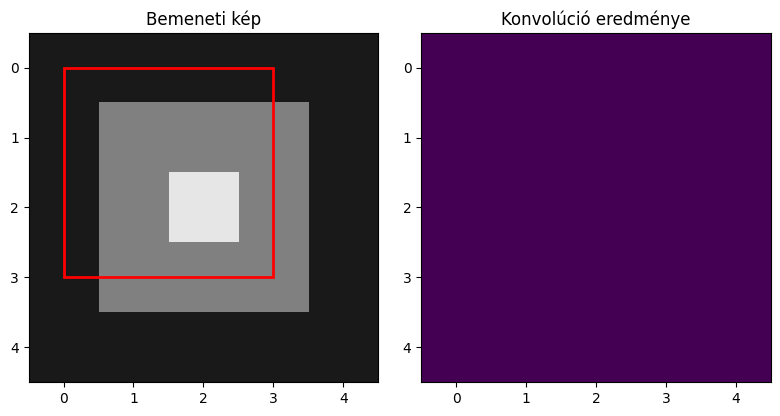

In [13]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.patches import Rectangle

# Bemeneti kép (5x5)
image = np.array([
    [10, 10, 10, 10, 10],
    [10, 50, 50, 50, 10],
    [10, 50, 90, 50, 10],
    [10, 50, 50, 50, 10],
    [10, 10, 10, 10, 10]
], dtype=float)

# 3x3 átlagoló kernel
kernel = np.ones((3, 3)) / 9
kh, kw = kernel.shape
h, w = image.shape
oh, ow = h - kh + 1, w - kw + 1

# Kimeneti kép
output = np.zeros_like(image)

# Ábrák előkészítése
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.set_title("Bemeneti kép")
ax2.set_title("Konvolúció eredménye")
im1 = ax1.imshow(image, cmap='gray', vmin=0, vmax=100)
im2 = ax2.imshow(output, cmap='viridis', vmin=0, vmax=100)
text = ax2.text(0.5, -0.15, "", transform=ax2.transAxes, ha="center")

# Mozgó keret
rect = Rectangle((0, 0), kw, kh, edgecolor='red', facecolor='none', linewidth=2)
ax1.add_patch(rect)

# Animációs lépés
def convolve_step(i):
    row = i // ow
    col = i % ow

    # Konvolúciós ablak
    region = image[row:row+kh, col:col+kw]
    value = np.sum(region * kernel)
    output[row+1, col+1] = value  # +1: a kimeneti pixel közepére kerül

    # Frissítések
    im2.set_array(output)
    text.set_text(f"Pozíció: ({row}, {col})\nÉrték: {value:.1f}")
    rect.set_xy((col, row))

# Animáció beállítása
frames = oh * ow
ani = animation.FuncAnimation(
    fig, lambda i: convolve_step(i), frames=frames,
    interval=1000, repeat=False
)

plt.tight_layout()
plt.show()
# Save the animation
ani.save('convolution.gif', writer='pillow', fps=10)

## 1 dimensional example

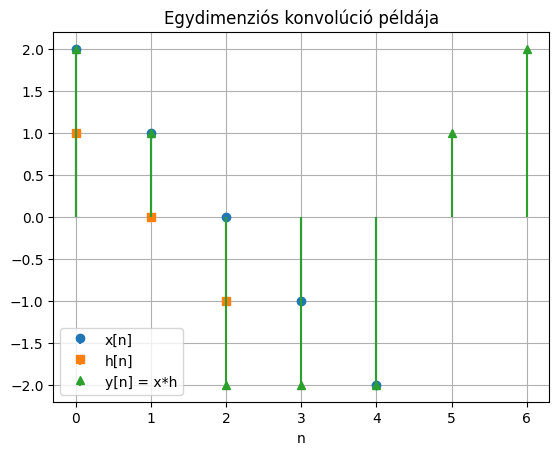

In [18]:
# Bemeneti jel és kernel
x = np.array([2, 1, 0, -1, -2])
h = np.array([1, 0, -1])  # Élkiemelő

# Konvolúció számítása (full mód)
y = np.convolve(x, h, mode='full')

# Ábrázolás
plt.stem(range(len(x)), x, linefmt='C0-', markerfmt='C0o', basefmt=" ", label="x[n]")
plt.stem(range(len(h)), h, linefmt='C1-', markerfmt='C1s', basefmt=" ", label="h[n]")
plt.stem(range(len(y)), y, linefmt='C2-', markerfmt='C2^', basefmt=" ", label="y[n] = x*h")

plt.title("Egydimenziós konvolúció példája")
plt.xlabel("n")
plt.legend()
plt.grid(True)
plt.show()

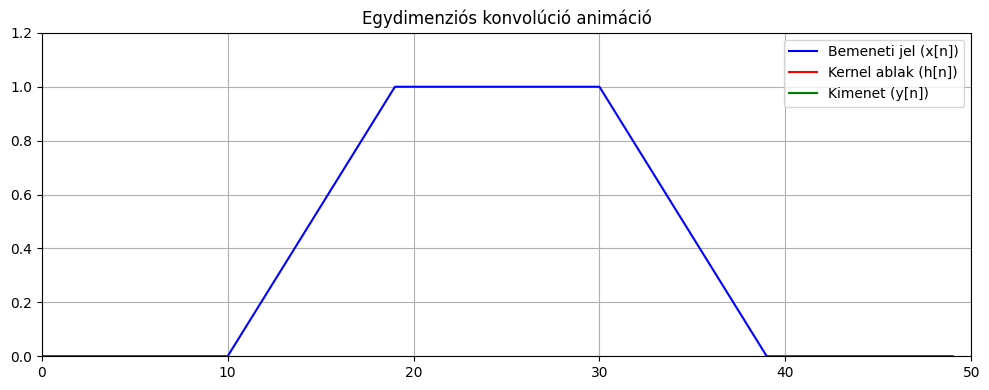

In [14]:
# Hosszabb bemeneti jel (pl. egy "jelalak")
x = np.concatenate([
    np.zeros(10),
    np.linspace(0, 1, 10),
    np.ones(10),
    np.linspace(1, 0, 10),
    np.zeros(10)
])

# Szűrő (egyszerű mozgó átlag)
h = np.array([0.25, 0.5, 0.25])
kernel_len = len(h)

# Kimenet helyeinek számítása
y = np.convolve(x, h, mode='valid')
output = np.zeros_like(y)

# Ábra előkészítése
fig, ax = plt.subplots(figsize=(10, 4))
ax.set_title("Egydimenziós konvolúció animáció")
ax.set_xlim(0, len(x))
ax.set_ylim(min(x)*1.2, max(x)*1.2)

line_x, = ax.plot(x, label="Bemeneti jel (x[n])", color='blue')
line_h, = ax.plot([], [], label="Kernel ablak (h[n])", color='red')
line_y, = ax.plot([], [], label="Kimenet (y[n])", color='green')
text = ax.text(0.02, 0.9, "", transform=ax.transAxes)

ax.legend(loc='upper right')
ax.grid(True)

# Animációs lépés
def update(frame):
    i = frame
    # Kernel pozíciójának kirajzolása
    kernel_pos = np.zeros_like(x)
    kernel_pos[i:i+kernel_len] = h * x[i:i+kernel_len]

    line_h.set_data(np.arange(len(x)), kernel_pos)

    # Kimeneti érték kiszámítása
    val = np.sum(h * x[i:i+kernel_len])
    output[i] = val
    line_y.set_data(np.arange(len(output)), output)

    text.set_text(f"Pozíció: n={i}   y[n]={val:.2f}")
    return line_h, line_y, text

ani = animation.FuncAnimation(
    fig, update, frames=len(y),
    interval=300, repeat=False
)

plt.tight_layout()
plt.show()
# Save the animation
ani.save('convolution_1d.gif', writer='pillow', fps=10)


In [15]:
print(x)
print(x.shape)
print(x.T.shape)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.11111111
 0.22222222 0.33333333 0.44444444 0.55555556 0.66666667 0.77777778
 0.88888889 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         0.88888889 0.77777778 0.66666667 0.55555556 0.44444444
 0.33333333 0.22222222 0.11111111 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]
(50,)
(50,)


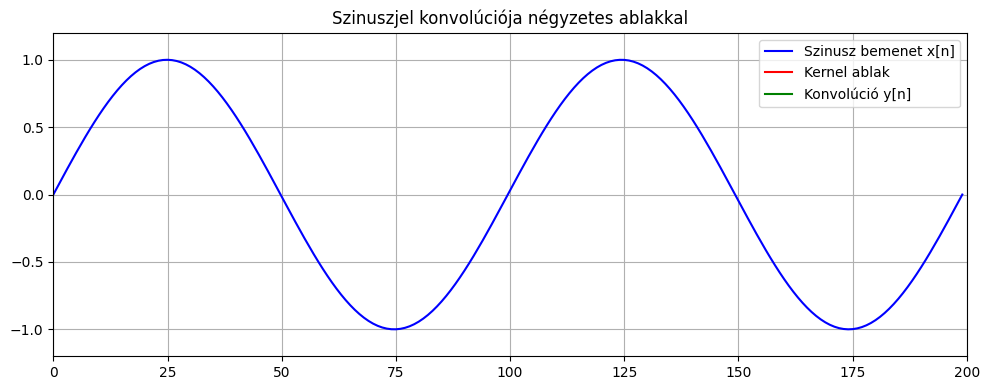

In [16]:
# Bemeneti jel: szinusz
n_points = 200
x = np.sin(np.linspace(0, 4 * np.pi, n_points))

# Kernel: négyzetes ablak (egyszerű átlagoló szűrő)
kernel_size = 15
h = np.ones(kernel_size) / kernel_size

# Konvolúció eredménye (valid mód)
y = np.convolve(x, h, mode='valid')
output = np.zeros_like(y)

# Ábra előkészítése
fig, ax = plt.subplots(figsize=(10, 4))
ax.set_title("Szinuszjel konvolúciója négyzetes ablakkal")
ax.set_xlim(0, len(x))
ax.set_ylim(-1.2, 1.2)

line_x, = ax.plot(x, label="Szinusz bemenet x[n]", color='blue')
line_h, = ax.plot([], [], label="Kernel ablak", color='red')
line_y, = ax.plot([], [], label="Konvolúció y[n]", color='green')
text = ax.text(0.02, 0.9, "", transform=ax.transAxes)

ax.legend(loc='upper right')
ax.grid(True)

# Animációs lépés
def update(frame):
    i = frame
    # Kernel pozíció
    weighted = np.zeros_like(x)
    if i + kernel_size <= len(x):
        weighted[i:i+kernel_size] = h * x[i:i+kernel_size]
        val = np.sum(h * x[i:i+kernel_size])
        output[i] = val

    # Frissítés
    line_h.set_data(np.arange(len(x)), weighted)
    line_y.set_data(np.arange(len(output)), output)
    text.set_text(f"Pozíció: n={i}   y[n]={val:.3f}" if i + kernel_size <= len(x) else "")
    return line_h, line_y, text

ani = animation.FuncAnimation(
    fig, update, frames=len(y),
    interval=50, repeat=False
)

plt.tight_layout()
plt.show()
# Save the animation
ani.save('convolution_sin.gif', writer='pillow', fps=10)


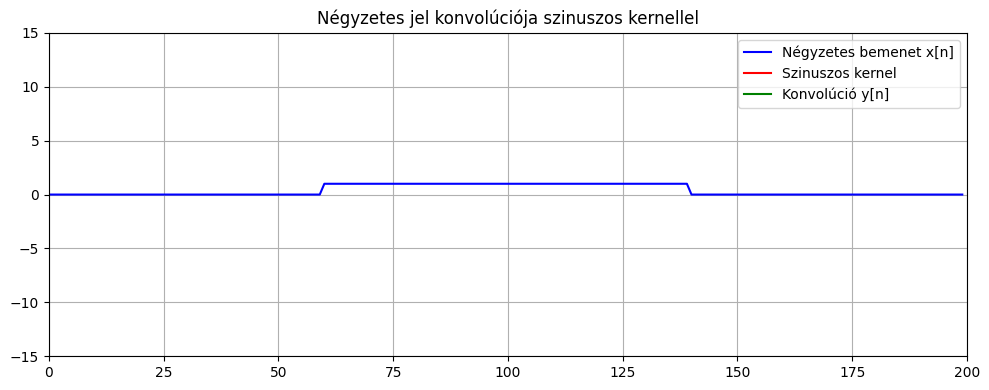

In [17]:
# Bemeneti jel: négyzetes ablak (blokkjel)
n_points = 200
x = np.zeros(n_points)
x[60:140] = 1  # blokk: 1 ott, máshol 0

# Kernel: szinuszhullám (ablakolt)
kernel_size = 30
t = np.linspace(0, 2 * np.pi, kernel_size)
h = np.sin(t)  # lehet np.cos(t) is

# Konvolúció eredménye (valid)
y = np.convolve(x, h, mode='valid')
output = np.zeros_like(y)

# Ábra előkészítése
fig, ax = plt.subplots(figsize=(10, 4))
ax.set_title("Négyzetes jel konvolúciója szinuszos kernellel")
ax.set_xlim(0, len(x))
ax.set_ylim(-kernel_size/2, kernel_size/2)

line_x, = ax.plot(x, label="Négyzetes bemenet x[n]", color='blue')
line_h, = ax.plot([], [], label="Szinuszos kernel", color='red')
line_y, = ax.plot([], [], label="Konvolúció y[n]", color='green')
text = ax.text(0.02, 0.9, "", transform=ax.transAxes)

ax.legend(loc='upper right')
ax.grid(True)

# Animációs lépés
def update(frame):
    i = frame
    # Kernel mozgása
    weighted = np.zeros_like(x)
    if i + kernel_size <= len(x):
        weighted[i:i+kernel_size] = h * x[i:i+kernel_size]
        val = np.sum(h * x[i:i+kernel_size])
        output[i] = val

    # Frissítés
    line_h.set_data(np.arange(len(x)), weighted)
    line_y.set_data(np.arange(len(output)), output)
    text.set_text(f"Pozíció: n={i}   y[n]={val:.3f}" if i + kernel_size <= len(x) else "")
    return line_h, line_y, text

ani = animation.FuncAnimation(
    fig, update, frames=len(y),
    interval=50, repeat=False
)

plt.tight_layout()
plt.show()
# Save the animation
ani.save('convolution_square.gif', writer='pillow', fps=10)

## Konvolúciós módok

D:\dev\envs\hakiko-cyb\Lib\site-packages\numpy\_core\numeric.py:457: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')


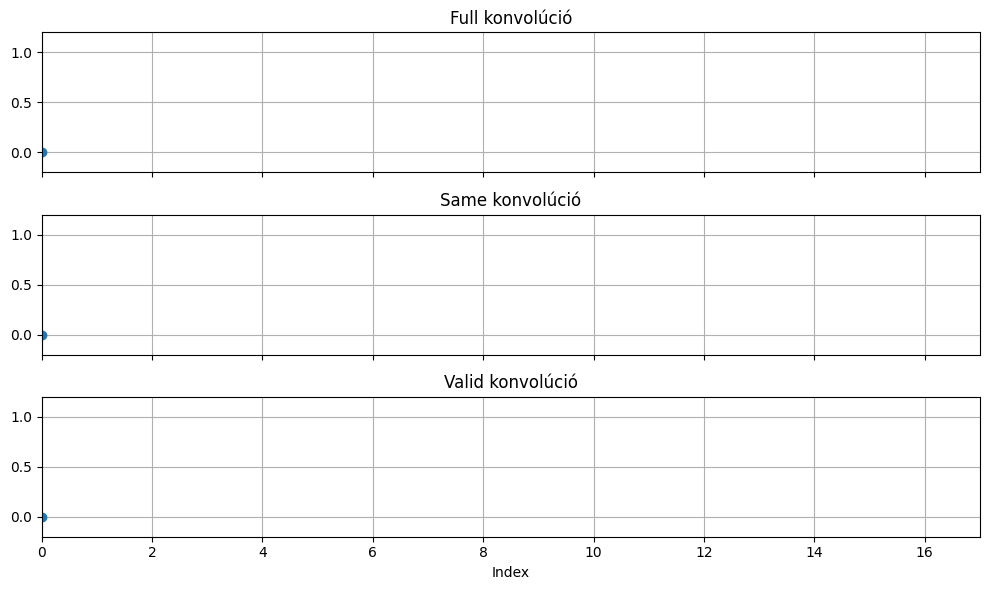

In [18]:
# Bemeneti jel (lépcsőjel)
x = np.concatenate([np.zeros(5), np.ones(5), np.zeros(5)])
h = np.array([0.2, 0.5, 0.2])  # Szűrő

# Konvolúciók különböző módokkal
y_full = np.convolve(x, h, mode='full')
y_same = np.convolve(x, h, mode='same')
y_valid = np.convolve(x, h, mode='valid')

# Előkészített kimeneti tömbök animációhoz (NaN az üres helyekhez)
out_full = np.full_like(y_full, np.nan)
out_same = np.full_like(y_same, np.nan)
out_valid = np.full_like(y_valid, np.nan)

# Ábra és tengelyek előkészítése
fig, axs = plt.subplots(3, 1, figsize=(10, 6), sharex=True)
titles = ['Full konvolúció', 'Same konvolúció', 'Valid konvolúció']
true_outputs = [y_full, y_same, y_valid]
outputs = [out_full, out_same, out_valid]
lines = []
x_data = []

for y_true in true_outputs:
    x_data.append(np.arange(len(y_true)))

for ax, title, x_vals in zip(axs, titles, x_data):
    ax.set_ylim(-0.2, 1.2)
    ax.set_xlim(0, max(len(y_full), len(y_same), len(y_valid)))
    ax.set_title(title)
    ax.grid(True)
    line, = ax.plot(x_vals, np.full_like(x_vals, np.nan), 'o-', color='C0')
    lines.append(line)

axs[-1].set_xlabel("Index")

# Frissítési függvény az animációhoz
def update(frame):
    for i in range(3):
        if frame < len(true_outputs[i]):
            outputs[i][frame] = true_outputs[i][frame]
            lines[i].set_ydata(outputs[i])
    return lines

# Animáció létrehozása
ani = animation.FuncAnimation(
    fig, update,
    frames=max(len(y_full), len(y_same), len(y_valid)),
    interval=500,
    blit=True,
    repeat=False
)

plt.tight_layout()
plt.show()
# Save the animation
ani.save('convolution_modes.gif', writer='pillow', fps=10)

# Filtering on images
The following code demonstrates the filtering of an image using a kernel. The kernel is a 3x3 matrix that is convolved with the image to produce a filtered output. The example uses a simple averaging kernel, but other kernels can be used for different effects (e.g., edge detection, sharpening).

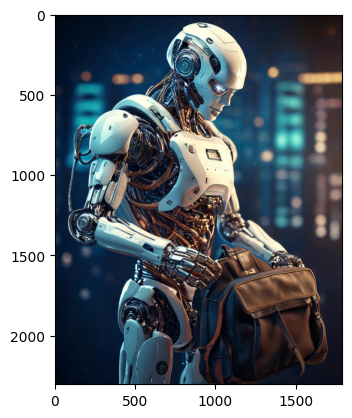

In [19]:
# Load an image
image = cv2.imread('data/robot.jpg')
# Plot original image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

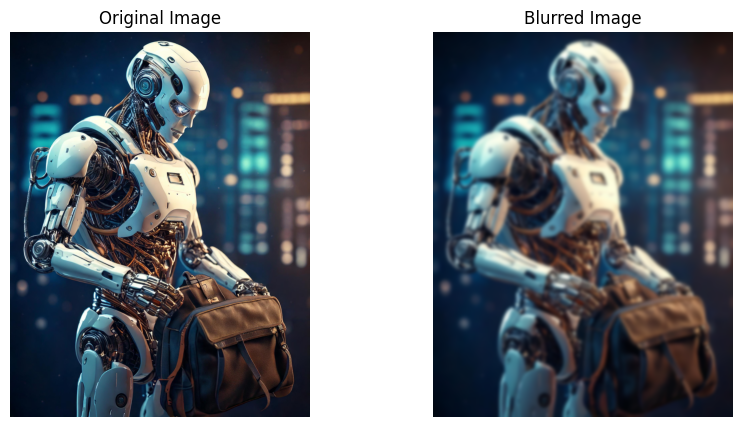

In [20]:
# Gaussian kernel on image
BLUR_FACTOR = 63
blurred = cv2.GaussianBlur(image, (BLUR_FACTOR, BLUR_FACTOR), 0)
# Plot the original and blurred images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
plt.title('Blurred Image')
plt.axis('off')
plt.show()

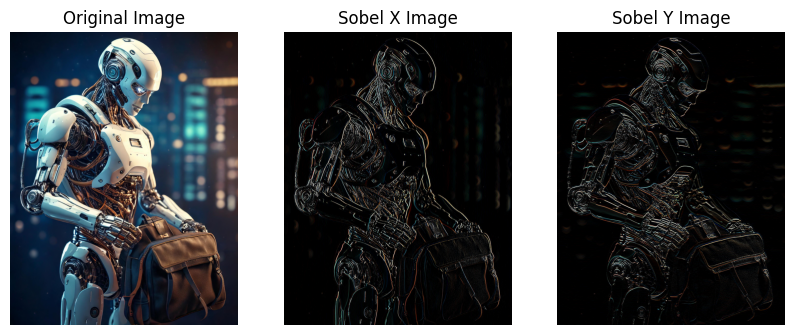

In [21]:
# Sobel kernel on image
sobel_x = np.array([[1, 0, -1],
                     [2, 0, -2],
                     [1, 0, -1]])
sobel_y = np.array([[1, 2, 1],
                     [0, 0, 0],
                     [-1, -2, -1]])
# Sobel filter in x direction
sobel_x_image = cv2.filter2D(image, -1, sobel_x)
# Sobel filter in y direction
sobel_y_image = cv2.filter2D(image, -1, sobel_y)
# Show the original and sobel images
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(sobel_x_image, cv2.COLOR_BGR2RGB))
plt.title('Sobel X Image')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(sobel_y_image, cv2.COLOR_BGR2RGB))
plt.title('Sobel Y Image')
plt.axis('off')
plt.show()

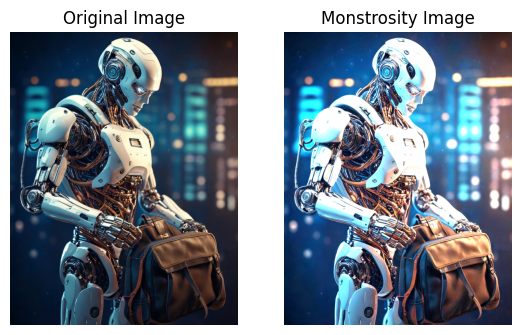

In [22]:
# Sobel kernel on image
monstrosity = 1/9 * np.array([[1, 0, -1],
                    [2, 9, -2],
                    [1, 8, 2],
                              [-1, 0, -1],
                              ])
# Sobel filter in x direction
monstrosity_image = cv2.filter2D(image, -1, monstrosity)
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(monstrosity_image, cv2.COLOR_BGR2RGB))
plt.title('Monstrosity Image')
plt.axis('off')
plt.show()

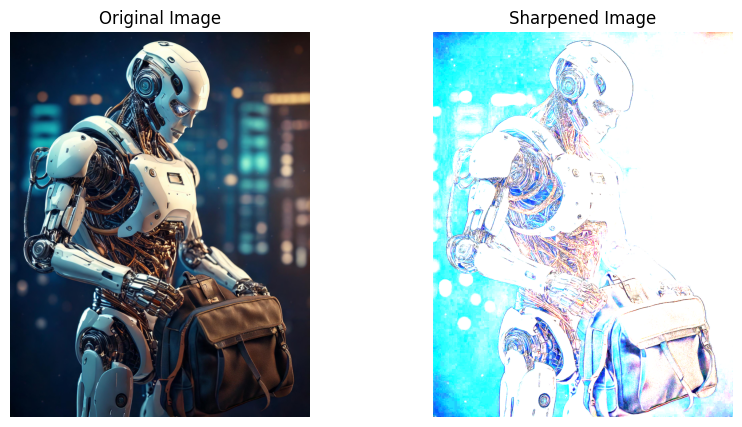

In [24]:
# Sharpening kernel on image
sharpening_kernel = 16*np.array([[0, -1, 0],
                               [-1, 5, -1],
                               [0, -1, 0]])
sharpened_image = cv2.filter2D(image, -1, sharpening_kernel)
# Show the original and sharpened images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
plt.title('Sharpened Image')
plt.axis('off')
plt.show()

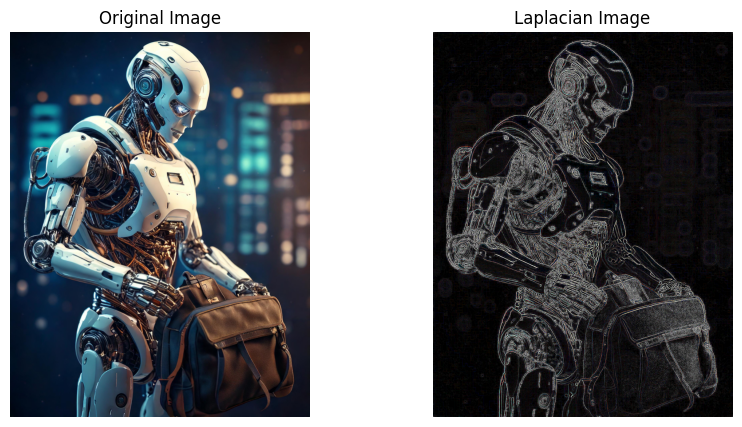

In [25]:
# Laplacian kernel on image
laplacian_kernel = 16*np.array([[0, 1, 0],
                              [1, -4, 1],
                              [0, 1, 0]])
laplacian_image = cv2.filter2D(image, -1, laplacian_kernel)
# Show the original and laplacian images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(laplacian_image, cv2.COLOR_BGR2RGB))
plt.title('Laplacian Image')
plt.axis('off')
plt.show()


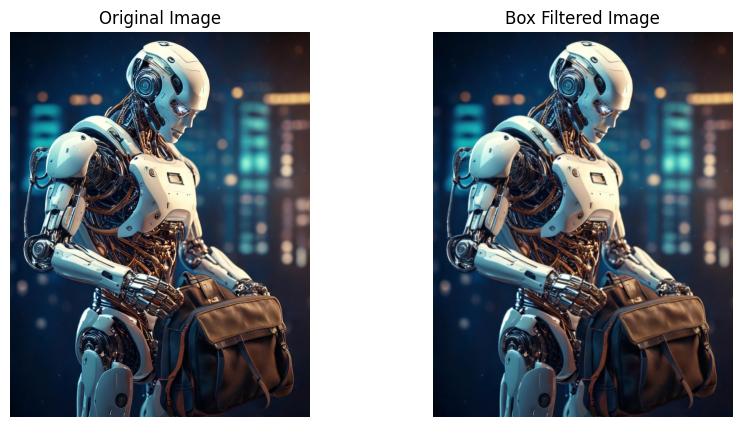

In [26]:
# Box filter kernel on image
box_filter_kernel = np.ones((5, 5), np.float32) / 25
box_filtered_image = cv2.filter2D(image, -1, box_filter_kernel)
# Show the original and box filtered images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(box_filtered_image, cv2.COLOR_BGR2RGB))
plt.title('Box Filtered Image')
plt.axis('off')
plt.show()

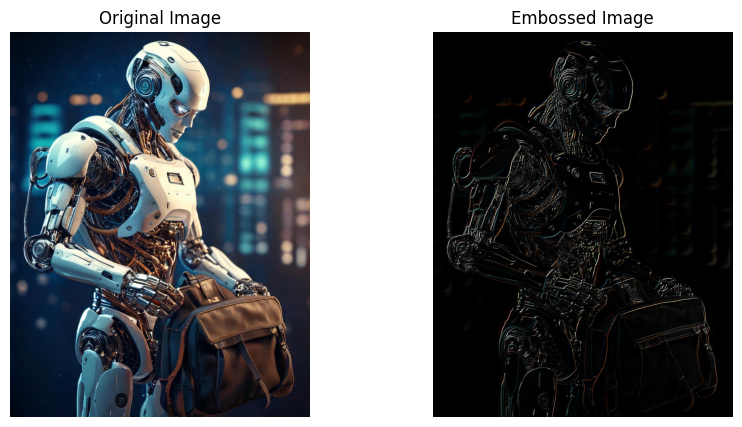

In [27]:
# Embossed image
emboss_kernel = np.array([[1, 1, 0],
                           [1, 0, -1],
                           [0, -1, -1]])
embossed_image = cv2.filter2D(image, -1, emboss_kernel)
# Show the original and embossed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(embossed_image, cv2.COLOR_BGR2RGB))
plt.title('Embossed Image')
plt.axis('off')
plt.show()

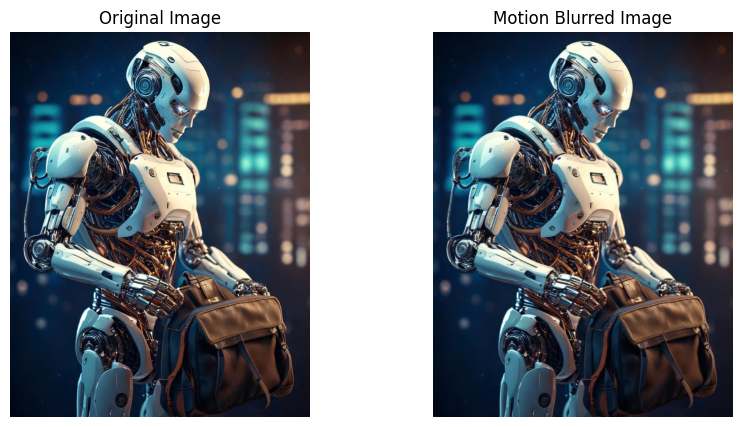

In [28]:
# Motion blur kernel on image

motion_blur_kernel = np.zeros((5, 5))
motion_blur_kernel[2, :] = np.ones(5)
motion_blur_kernel /= 5
motion_blurred_image = cv2.filter2D(image, -1, motion_blur_kernel)
# Show the original and motion blurred images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(motion_blurred_image, cv2.COLOR_BGR2RGB))
plt.title('Motion Blurred Image')
plt.axis('off')
plt.show()


## Nonlinear filters
Nonlinear filters are used to remove noise from images while preserving edges. They work by applying a nonlinear operation to the pixels in the neighborhood of each pixel.

In [29]:
def add_salt_and_pepper_noise(image, amount=0.01, salt_vs_pepper=0.5):
    noisy = image.copy()
    total_pixels = image.shape[0] * image.shape[1]
    num_salt = int(total_pixels * amount * salt_vs_pepper)
    num_pepper = int(total_pixels * amount * (1.0 - salt_vs_pepper))

    # Só (fehér) pixelek hozzáadása
    coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape[:2]]
    noisy[coords[0], coords[1]] = 255

    # Bors (fekete) pixelek hozzáadása
    coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape[:2]]
    noisy[coords[0], coords[1]] = 0

    return noisy

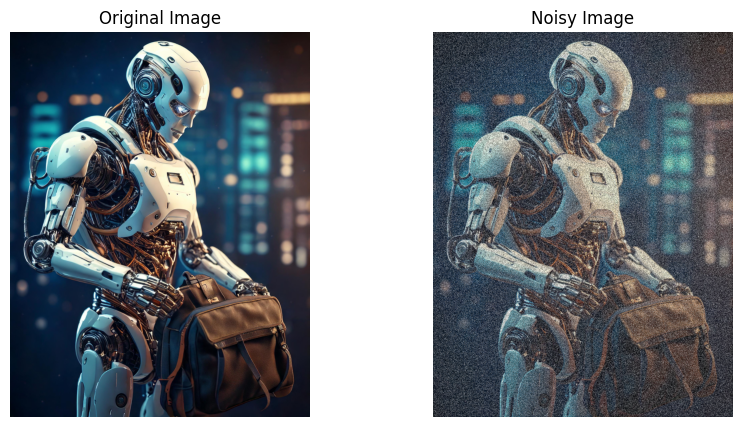

In [30]:
# Median filter on image
noisy_image = add_salt_and_pepper_noise(image, amount=0.5)
# Show the original and noisy images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
plt.title('Noisy Image')
plt.axis('off')
plt.show()

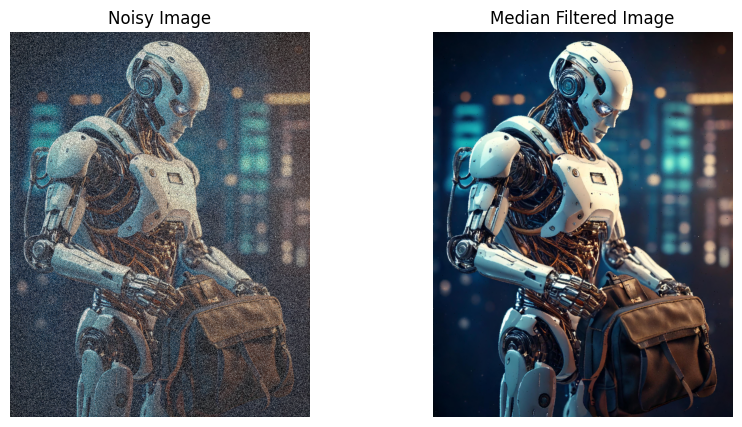

In [31]:
# Apply median filter
median_filtered_image = cv2.medianBlur(noisy_image, 5)
# Show the original and median filtered images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
plt.title('Noisy Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(median_filtered_image, cv2.COLOR_BGR2RGB))
plt.title('Median Filtered Image')
plt.axis('off')
plt.show()


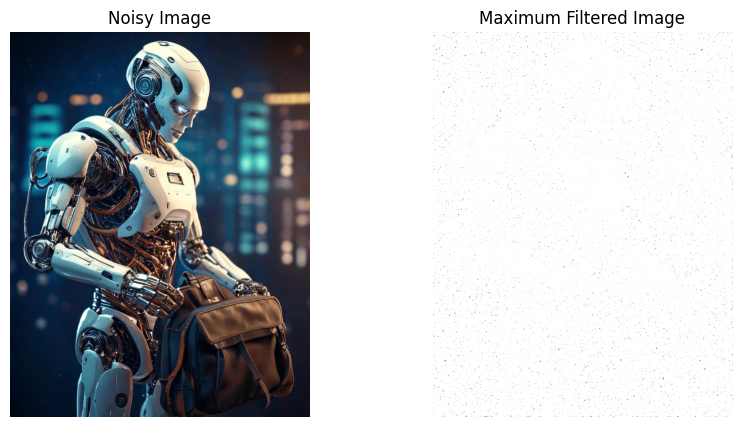

In [32]:
# Maximum filter on image
max_filtered_image = cv2.dilate(noisy_image, np.ones((5, 5), np.uint8))
# Show the original and maximum filtered images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Noisy Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(max_filtered_image, cv2.COLOR_BGR2RGB))
plt.title('Maximum Filtered Image')
plt.axis('off')
plt.show()

## Morphology operations
Morphological operations are non-linear image processing techniques used to analyze and process geometric structures in images. They are particularly useful for binary images, but can also be applied to grayscale images.

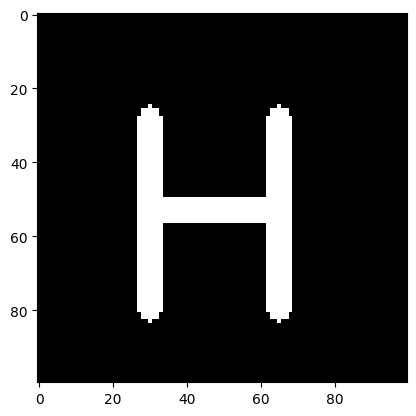

In [33]:
image = np.zeros((100, 100), dtype=np.uint8)
cv2.putText(image, "H", (20, 80), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=2.5, color=255, thickness=5)
# Plot the original image
plt.imshow(image, cmap='gray')

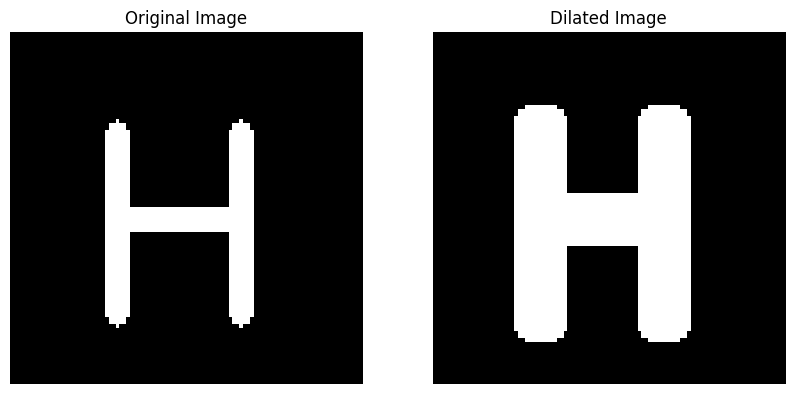

In [34]:
# Dilation
dilate = cv2.dilate(image, kernel, iterations=4)
# Plot the original and dilated images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(dilate, cmap='gray')
plt.title('Dilated Image')
plt.axis('off')
plt.show()

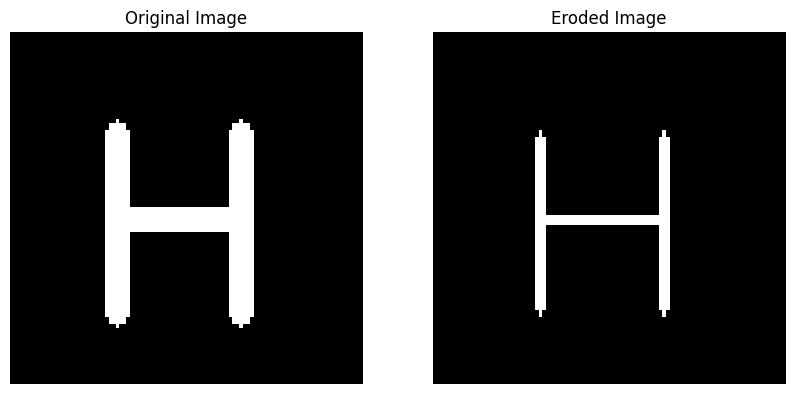

In [35]:
# Erosion
erode = cv2.erode(image, kernel, iterations=2)
# Plot the original and eroded images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(erode, cmap='gray')
plt.title('Eroded Image')
plt.axis('off')
plt.show()


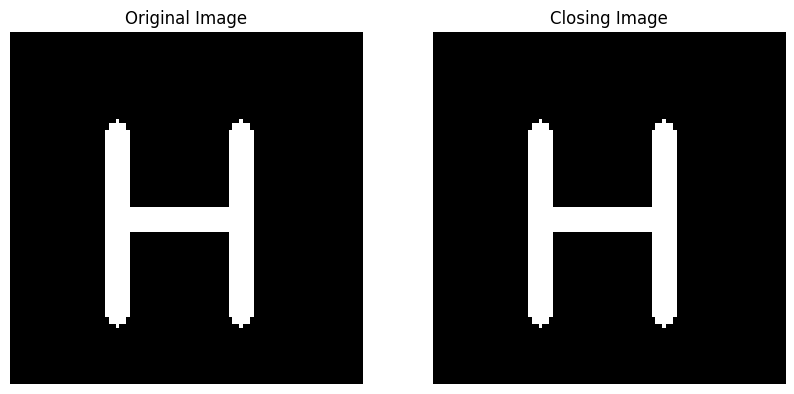

In [84]:
# Closing
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
# Plot the original and closing images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(closing, cmap='gray')
plt.title('Closing Image')
plt.axis('off')
plt.show()